# Import packages

In [1]:
%matplotlib inline
from pathlib import Path
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import xarray as xr

# Make plots nice

In [2]:
sns.set_style('darkgrid')
sns.set_context('talk')
plt.rcParams["figure.figsize"] = [15, 9]

# Open the data files and extract data

In [3]:
# Base path to the data
base_data_path = Path("/data/c2/TMdata/git_geomar_de_data/")

# derive list of file names for SLTAC and year 2016
data_files = [str(fn) for fn in base_data_path.glob("SLTAC_GLO_PHY_L4_REP/v1.x.x/data/2016/dt*nc")]

# open data set and extract pointer to SSH (absolute dynamic topography, adt, in the data)
ssh = xr.open_mfdataset(data_files).adt

# Calculate spatial SSH-averages for northern / southern tropics

In [4]:
ssh_north = ssh.sel(latitude=slice(0, 23.43699)).mean(dim=["longitude", "latitude"])
ssh_south = ssh.sel(latitude=slice(-23.43699, 0)).mean(dim=["longitude", "latitude"])

In [5]:
ssh_north_index = ((ssh_north - ssh_north.mean(dim="time")) /
                   ssh_north.std(dim="time")).rename("Northern Tropics")
ssh_south_index = ((ssh_south - ssh_south.mean(dim="time")) /
                   ssh_south.std(dim="time")).rename("Southern Tropics")

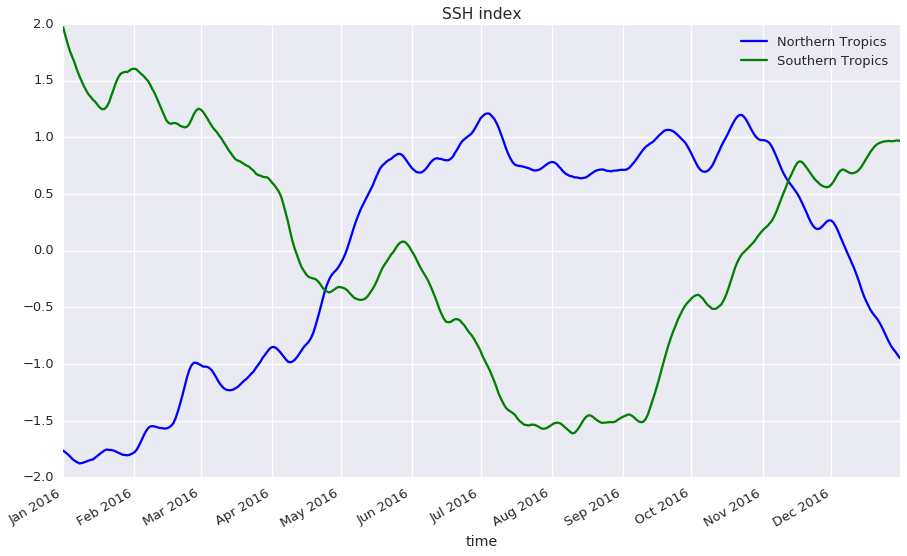

In [6]:
fig, ax = plt.subplots(1, 1)

ssh_north_index.plot(ax=ax);
ssh_south_index.plot(ax=ax);

ax.set_ylabel("");
ax.set_title("SSH index");
ax.legend(loc=0);

# Version number of the data

In [7]:
!(cd /data/c2/TMdata/git_geomar_de_data/SLTAC_GLO_PHY_L4_REP/v1.x.x/; \
  pwd -P; \
  /home/wrath/TM/software/miniconda3_latest/envs/git/bin/git describe;)

/data/c2/TMdata/git_geomar_de_data/SLTAC_GLO_PHY_L4_REP/v1.x.x
v1.1.0
